In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='TV'>

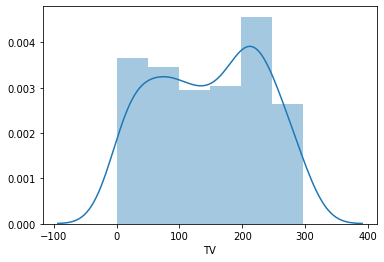

In [9]:
sns.distplot(df["TV"])

In [10]:
df["TV"].describe()

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper'>

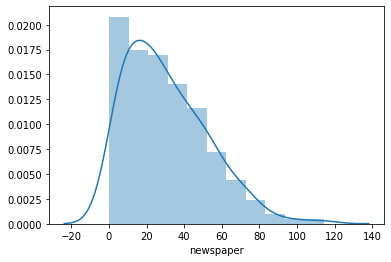

In [12]:
sns.distplot(df["newspaper"])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop("sales",axis=1)
y = df["sales"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 34)

In [16]:
x_train.shape

(160, 3)

In [17]:
x_test.shape

(40, 3)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
mod = lr.fit(x_train, y_train)

In [20]:
pred = lr.predict(x_test)

In [21]:
pred

array([17.33089326,  6.75657771, 24.30904964,  5.0515769 , 15.54271689,
       19.29966726, 10.65153419,  9.47040745,  7.62877327, 18.56995309,
       10.40850671, 16.96844045,  4.13394635,  5.75005469, 14.92883965,
       17.95988405, 15.28407964, 17.6009688 , 16.35119177, 16.38081251,
       10.19630447,  6.31423514, 11.70398085, 21.39454865,  8.64541883,
        9.5062513 , 21.74650212,  7.90163093,  4.15147714, 18.46125392,
       15.24139197, 14.57384327,  7.59848042,  9.98613533, 15.52765483,
       11.68497014, 21.21024866,  9.28154151, 23.93423273,  4.12087818])

In [22]:
y_test

74     17.0
10      8.6
183    26.2
195     7.6
87     16.0
142    20.1
166     8.0
79     11.0
129     9.7
184    17.6
180    10.5
64     18.0
76      6.9
189     6.7
26     15.0
169    15.0
97     15.5
3      18.5
40     16.6
113    15.9
158     7.3
127     8.8
75      8.7
55     23.7
46     10.6
145    10.3
30     21.4
24      9.7
91      7.3
14     19.0
146    13.2
81     12.3
65      9.3
82     11.3
131    12.7
134    10.8
69     22.3
140    10.9
198    25.5
192     5.9
Name: sales, dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mean_squared_error(y_test, pred)

3.1911211213641772

In [25]:
mean_absolute_error(y_test, pred)

1.5294148702152408

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
r2_score(y_test, pred)

0.8925087896627704

In [28]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
## log transformation - skewed to normal

df["newspaper"] = df["newspaper"].apply(np.log1p)

<AxesSubplot:xlabel='newspaper'>

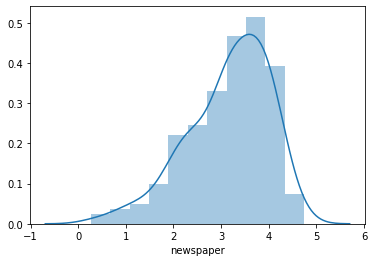

In [31]:
sns.distplot(df["newspaper"])

In [32]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,4.251348,22.1
1,44.5,39.3,3.830813,10.4
2,17.2,45.9,4.252772,9.3
3,151.5,41.3,4.085976,18.5
4,180.8,10.8,4.084294,12.9


In [33]:
## for normal distributed variabel dont do log transform - just for eample i did this
df["TV"] = df["TV"].apply(np.log1p)
df["radio"] = df["radio"].apply(np.log1p)

In [34]:
x = df.drop("sales",axis=1)
y = df["sales"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 3)

In [36]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
pred1 = lr.predict(x_test)

In [38]:
mean_absolute_error(y_test, pred1)

1.6594604265093782

In [39]:
mean_squared_error(y_test, pred1)

4.271275928900668

In [40]:
r2_score(y_test, pred1)

0.8291267065975076

In [41]:
import statsmodels.api as sm

In [42]:
x = sm.add_constant(x)

In [43]:
result = sm.OLS(y, x).fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     364.1
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           7.47e-80
Time:                        03:11:42   Log-Likelihood:                -425.39
No. Observations:                 200   AIC:                             858.8
Df Residuals:                     196   BIC:                             872.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9880      0.946    -14.793      0.000     -15.853     -12.123
TV             4.0536      0.151     26.804      0.000       3.755       4.352
radio          2.9836      0.164     18.178      0.000       2.660       3.307
newspaper      0.1157      0.172      0.674      0.501      -0.223       0.454
==============================================================================
Omnibus:                       43.585   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.414
Skew:                           1.301   Prob(JB):                     1.03e-14
Kurtosis:                       3.981   Cond. No.                         42.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
x = df.drop(["sales", "newspaper"],axis=1)
y = df["sales"]

In [46]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
pred2 = lr.predict(x_test)

In [48]:
mean_absolute_error(y_test, pred2)

1.6594604265093782

In [49]:
df = pd.read_csv("Advertising.csv")

In [50]:
x = df.drop(['Unnamed: 0', "sales", "newspaper"],axis=1)
y = df["sales"]

In [51]:
x.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 2)

In [53]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
pred4 = lr.predict(x_test)

In [55]:
mean_absolute_error(y_test, pred4)

1.6190770148956113

In [56]:
r2_score(y_test, pred4)

0.7629335290913722

In [57]:
mean_squared_error(y_test, pred4)

4.403851961845135

In [58]:
#r2_score(x_train, y_train)

In [59]:
lr.coef_

array([0.0474347 , 0.17565547])

In [61]:
train_pred = lr.predict(x_train)

In [62]:
r2_score(y_train, train_pred)

0.9148698946311157

In [63]:
### model is facing overfitting problem.

In [64]:
from sklearn.linear_model import Ridge, Lasso

In [65]:
## Lasso Regression

ls = Lasso()
ls.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
ls_pred = ls.predict(x_test)

In [67]:
r2_score(y_test, ls_pred)

0.7561100535579709

In [68]:
ls_train = ls.predict(x_train)

In [69]:
r2_score(y_train, ls_train)

0.9147117729998732

In [70]:
ls.coef_

array([0.04742944, 0.17105813])

### Bigmart use case

In [6]:
import pandas as pd
df = pd.read_csv("bigmart_train.csv")

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDF56     9
FDO19     9
FDV60     9
         ..
FDN52     1
FDK57     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [12]:
df = df.drop("Item_Identifier",axis=1)

In [13]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [14]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df.shape

(8523, 11)

In [19]:
df.isnull().sum()/len(df)*100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Item_Weight'>

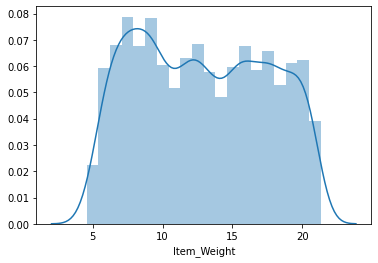

In [21]:
sns.distplot(df["Item_Weight"])

In [22]:
df["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [23]:
## fill missing values

df["Item_Weight"] = df["Item_Weight"].fillna(12.85)

In [24]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df.shape

(6113, 11)

In [28]:
df_cat = df.select_dtypes(include="object")
df_num = df.select_dtypes(exclude="object")

In [29]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2


In [30]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088


In [31]:
df_num["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2009     928
Name: Outlet_Establishment_Year, dtype: int64

In [32]:
df_cat["Outlet_Establishment_Year"] = df_num["Outlet_Establishment_Year"]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,1999
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,2009
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,1999
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,1987
5,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2,2009


In [34]:
df_num = df_num.drop("Outlet_Establishment_Year",axis=1)

In [35]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
4,8.930,0.000000,53.8614,994.7052
5,10.395,0.000000,51.4008,556.6088


In [36]:
df_cat.dtypes

Item_Fat_Content             object
Item_Type                    object
Outlet_Identifier            object
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Outlet_Establishment_Year     int64
dtype: object

In [37]:
df_cat["Outlet_Establishment_Year"] = df_cat["Outlet_Establishment_Year"].astype("category")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_cat.dtypes

Item_Fat_Content               object
Item_Type                      object
Outlet_Identifier              object
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Outlet_Establishment_Year    category
dtype: object

In [39]:
## drop the dependent variable

df_num = df_num.drop("Item_Outlet_Sales",axis=1)

In [40]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.300,0.016047,249.8092
1,5.920,0.019278,48.2692
2,17.500,0.016760,141.6180
4,8.930,0.000000,53.8614
5,10.395,0.000000,51.4008


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc= StandardScaler()
df_num_1 = sc.fit_transform(df_num)

In [43]:
df_num_1

array([[-0.88058021, -0.96744996,  1.74452423],
       [-1.71033753, -0.90294527, -1.49438717],
       [ 1.13244052, -0.95321955,  0.00580382],
       ...,
       [-0.56144277, -0.58534353, -0.90212633],
       [-1.393655  ,  1.61147492, -0.61267815],
       [ 0.46961662, -0.39184415, -1.05729644]])

In [44]:
df_num_sc = pd.DataFrame(df_num_1, index = df_num.index, columns=df_num.columns)

In [45]:
df_num_sc.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.880580,-0.967450,1.744524
1,-1.710338,-0.902945,-1.494387
2,1.132441,-0.953220,0.005804
4,-0.971412,-1.287832,-1.404516
5,-0.611768,-1.287832,-1.444060


In [46]:
## categorical processing

df_cat_dum = pd.get_dummies(df_cat)

In [47]:
df_cat_dum.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2009
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [48]:
df_final = pd.concat([df_cat_dum, df_num_sc, df["Item_Outlet_Sales"]],axis=1)

In [49]:
df_final.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2009,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,-0.880580,-0.967450,1.744524,3735.1380
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,-1.710338,-0.902945,-1.494387,443.4228
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1.132441,-0.953220,0.005804,2097.2700
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,-0.971412,-1.287832,-1.404516,994.7052
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,-0.611768,-1.287832,-1.444060,556.6088


In [50]:
x = df_final.drop("Item_Outlet_Sales",axis=1)
y = df_final["Item_Outlet_Sales"]

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 56)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
pred = lr.predict(x_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
r2_score(y_test, pred)

0.5548429338666024

In [59]:
mean_absolute_error(y_test, pred)

844.6861525756337

In [60]:
pred_train = lr.predict(x_train)

In [61]:
r2_score(y_train, pred_train)

0.5616519475182042

In [63]:
from sklearn.linear_model import Lasso, Ridge
ls = Lasso()
ls.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
ls_pred = ls.predict(x_test)

In [65]:
r2_score(y_test, ls_pred)

0.5561687309231504

In [95]:
ls = Lasso(alpha=2)
ls.fit(x_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [96]:
ls_pred = ls.predict(x_test)

In [97]:
r2_score(y_test, ls_pred)

0.5628236889515708

In [104]:
ls = Lasso(alpha=0.1)
ls.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
ls_pred = ls.predict(x_test)

In [106]:
r2_score(y_test, ls_pred)

0.5619434353090269

In [66]:
ls.coef_

array([-6.41473207e+01, -0.00000000e+00,  2.37541119e+01,  9.60689055e+01,
       -0.00000000e+00, -0.00000000e+00,  1.00025991e+02,  1.80567524e+02,
        1.01141399e+01, -5.50983979e+00, -6.87179727e+00,  3.89412803e+01,
       -1.79432976e+01,  1.55961448e+01, -2.85814380e+01, -1.62441964e+01,
        0.00000000e+00,  2.23876170e+01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -3.33311397e+02, -1.93419482e+03,
        1.39316599e+03,  3.49716436e+01, -4.63415231e+01,  8.69696400e+00,
       -0.00000000e+00,  3.90573841e+01, -0.00000000e+00, -0.00000000e+00,
        5.81756990e+01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  6.98408974e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.07287719e-01, -0.00000000e+00,
       -1.65084809e+01,  1.71412392e-01,  1.04566315e+03])

In [67]:
x.columns

Index(['Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store'

In [68]:
x = x.drop(["Item_Fat_Content_Low Fat","Item_Fat_Content_reg"],axis=1)

In [69]:
x

,Item_Fat_Content_LF,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2009,Item_Weight,Item_Visibility,Item_MRP
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,-0.880580,-0.967450,1.744524
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-1.710338,-0.902945,-1.494387
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1.132441,-0.953220,0.005804
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-0.971412,-1.287832,-1.404516
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.611768,-1.287832,-1.444060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1.930284,0.381360,0.603860
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,-1.478349,-0.154161,1.177427
8520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.561443,-0.585344,-0.902126
8521,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-1.393655,1.611475,-0.612678


In [70]:
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6113, dtype: float64

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 54)

In [72]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
pred1 = lr.predict(x_test)

In [74]:
r2_score(y_test, pred1)

0.505000117352687

In [75]:
ls.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
ls_pred1 = ls.predict(x_test)

In [77]:
r2_score(y_test, ls_pred1)

0.5065864910022488

In [78]:
x = df_final.drop("Item_Outlet_Sales",axis=1)
y = df_final["Item_Outlet_Sales"]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 45)

In [80]:
ls = Lasso(alpha=0.001)
ls.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249069713.13821793, tolerance: 1452068.8684991687
  positive)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
ls_pred = ls.predict(x_test)

In [82]:
r2_score(y_test, ls_pred)

0.5618948999990973

In [83]:
ls = Lasso(alpha=0.01)
ls.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449322718.93629265, tolerance: 1452068.8684991687
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
ls_pred = ls.predict(x_test)

In [85]:
r2_score(y_test, ls_pred)

0.5618992683977022

In [86]:
ls = Lasso(alpha=2)
ls.fit(x_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [87]:
ls_pred = ls.predict(x_test)

In [88]:
r2_score(y_test, ls_pred)

0.5628236889515708

In [89]:
## Ridge
rd = Ridge(alpha=5)
rd.fit(x_train, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [90]:
rd_pred = rd.predict(x_test)

In [91]:
r2_score(y_test, rd_pred)

0.5619655758831876

In [92]:
rd.coef_

array([ -80.44090958,    3.69526076,    7.57474623,  181.73401159,
       -112.563109  ,   43.75147713,  -12.27145864,  120.71020759,
         12.47732199,  -31.31194395,  -18.29585418,   -6.00416608,
        -30.05990703,   70.72458432,  -49.88492624,   24.07378359,
        -47.99145075,  125.63353606,  -42.01390582,  -64.20245744,
        -95.33484057, -102.75965815, -216.27066876, -575.03430011,
        543.64384288,  106.48564069,  241.5589081 ,    2.37623534,
       -102.75965815,  329.74940946, -226.98975131, -331.09915666,
        106.48564069,  224.61351597, -575.03430011,  247.66112599,
       -216.27066876,  543.64384288,  -31.39045723, -102.75965815,
        241.5589081 ,    2.37623534,  106.48564069, -216.27066876,
        -18.42833466,  -11.72469261, 1011.92843534])

In [93]:
ls.coef_

array([-3.74088612e+01, -0.00000000e+00,  7.00413624e+00,  2.46111398e+01,
       -0.00000000e+00,  2.70234389e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  5.36785128e+01, -1.73407370e+01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.56842870e+01, -1.52065502e+01,
       -0.00000000e+00, -0.00000000e+00, -3.06461601e+02, -1.89501157e+03,
        1.37114088e+03,  8.51221697e+01, -0.00000000e+00,  1.40371407e+01,
       -0.00000000e+00,  4.67491325e+01, -0.00000000e+00, -0.00000000e+00,
        6.51157391e+01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  9.56823165e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  2.23965977e-01, -0.00000000e+00,
       -1.76077223e+01, -1.06214951e+01,  1.00951200e+03])

In [94]:
pred

array([1864.,  616., 3132., ..., 3480., 1584., 1576.])